## <font color='darkblue'>Preface</font>
([article source](https://analyticsindiamag.com/how-to-use-xgboost-for-time-series-analysis/), [colab](https://colab.research.google.com/drive/18HhPMhxFwWtpME6uZu0q7m2jH_U9Zlsc?usp=sharing)) <font size='3ptx'><b>[XGBoost](https://analyticsindiamag.com/xgboost-internal-working-to-make-decision-trees-and-deduce-predictions/) is an efficient technique for implementing gradient boosting. When talking about time series modelling, we generally refer to the techniques like [ARIMA](https://analyticsindiamag.com/comprehensive-guide-to-time-series-analysis-using-arima/) and [VAR](https://analyticsindiamag.com/a-guide-to-varma-with-grid-search-in-time-series-modelling/) models. </b></font>

<b>[XGBoost](https://analyticsindiamag.com/xgboost-internal-working-to-make-decision-trees-and-deduce-predictions/), as a gradient boosting technique, can be considered as an advancement of traditional modelling techniques. In this article, we will learn how we can apply gradient boosting with the XGBoost technique for effective time series modelling</b>. The major points to be discussed in this article are listed below.

### <font color='darkgreen'>Agenda</font>
* <font size='3ptx'><b><a href='#sect1'>What is gradient boosting?</a></b></font>
* <font size='3ptx'><b><a href='#sect2'>What is XGBoost?</a></b></font>
* <font size='3ptx'><b><a href='#sect3'>Using XGBoost in time series</a></b></font>
* <font size='3ptx'><b><a href='#sect4'>The procedure</a></b></font>
    * <b><a href='#sect4_1'>Data analysis</a></b>
    * <b><a href='#sect4_2'>Data conversion</a></b>
    * <b><a href='#sect4_3'>Model fitting</a></b>
    * <b><a href='#sect4_4'>Forecasting</a></b> 

<a id='sect1'></a>
## <font color='darkblue'>What is gradient boosting?</font>
<font size='3ptx'><b>In machine learning, [gradient boosting](https://analyticsindiamag.com/story-of-gradient-boosting-how-it-evolved-over-years/) is an algorithm that helps in performing regression and classification tasks.</b></font>

Using the ensemble of weak prediction models, gradient boosting helps us in making predictions. Examples of weak models can be decision trees. <b>Ensembled models using weak tree learners can be considered gradient-boosted trees. Gradient-boosted trees are comparable to the random forest even though they can perform better than random forests if finely tuned.</b> It helps in generalizing the other model by optimizing the arbitrary differential loss function. 

<a id='sect2'></a>
## <font color='darkblue'>What is XGBoost?</font>
<font size='3ptx'><b>XGBoost is a library that can help us regularize gradient boosting in different languages like python, R, Julia, c++, and Java.</b></font>
    
<b>XGBoost stands for extreme gradient boosting machine. As software, the main focus of XGBoost is to speed up and increase the performance of gradient boosted decision trees.</b>  This software can provide us with scalable, portable, and distributed gradient boosting. Using this library we can utilize the functionality in single and distributed processing machines.  

<a id='sect3'></a>
## <font color='darkblue'>Using XGBoost in time series</font>
<font size='3ptx'><b>As we discussed in the above section, gradient boosting is majorly focused on improving the performance of the machine learning models and with gradient boosting using XGBoost we can speed up the procedure as well as we can get better results.</b></font>

When we talk about the field of time series analysis and forecasting we use traditional models like <b><a href='https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average'>ARIMA</a></b> (<font color='brown'>autoregressive integrated moving average</font>) models where the main focus or the model is on regression analysis and if we can perform this regression with such software and technique we can also achieve a state of the art performance in the time series modelling. Ensemble of weak machine learning models to regularized gradient boosting can help us in improving the results in every section of data science. <b>The section can also be time series. In this article, we will see how we can make XGBoost perform in time series modelling. </b>

<a id='sect4'></a>
## <font color='darkblue'>The procedure</font>
* <b><a href='#sect4_1'>Data analysis</a></b>
* <b><a href='#sect4_2'>Data conversions</a></b>
* <b><a href='#sect4_3'>Model fitting</a></b>
* <b><a href='#sect4_4'>Forecasting</a></b>
<br/>

<font size='3ptx'><b>In the procedure, we are going to use data from Kaggle which is a [Take-Away Food Orders data](https://www.kaggle.com/henslersoftware/19560-indian-takeaway-orders). </b></font>

We can find the data [here](https://www.kaggle.com/henslersoftware/19560-indian-takeaway-orders/code). In this data, we have details about the orders with the date of the order and quantity in the order. Using this information we will be predicting the order count for the next few dates. <b>For the procedure, we will be using the python language and some basic libraries like NumPy, pandas, matplotlib, and sklearn with this we will use XGBoost software</b>. Let’s start the procedure, as we will go far in the process we will be knowing how our analysis of the data is and how we can use XGBoost for forecasting.      

In [57]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

<a id='sect4_1'></a>
### <font color='darkgreen'>Data analysis</font>
Let’s start with loading the data:

In [3]:
data_csv_path = '../../datas/kaggle_indian-takeaway-orders/restaurant-1-orders.csv'
data = pd.read_csv(data_csv_path)
data.columns = ['number', 'date', 'item', 'quantity', 'price', 'total_items']
data.head()

,number,date,item,quantity,price,total_items
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [5]:
data.describe()

,number,quantity,price,total_items
count,74818.000000,74818.000000,74818.000000,74818.000000
mean,9115.638162,1.243564,5.286492,6.931434
std,4052.210452,0.798207,3.338221,3.954832
min,630.000000,1.000000,0.500000,1.000000
25%,5590.000000,1.000000,2.950000,5.000000
50%,9103.000000,1.000000,3.950000,6.000000
75%,12630.000000,1.000000,8.950000,8.000000
max,16118.000000,51.000000,17.950000,60.000000


In [7]:
print(data.dtypes)

number                  int64
date           datetime64[ns]
item                   object
quantity                int64
price                 float64
total_items             int64
dtype: object


Here in the data, we can see that we have the order number, date, item name, price, quantity, and total items in the order. Now let’s <b>convert the date values into date-time values</b>.

In [4]:
data['date'] = pd.to_datetime(data['date'].str[:10])
data.head()

,number,date,item,quantity,price,total_items
0,16118,2019-03-08,Plain Papadum,2,0.80,6
1,16118,2019-03-08,King Prawn Balti,1,12.95,6
2,16118,2019-03-08,Garlic Naan,1,2.95,6
3,16118,2019-03-08,Mushroom Rice,1,3.95,6
4,16118,2019-03-08,Paneer Tikka Masala,1,8.95,6


Here we can understand that to make predictions on the order count we are required to have the order `number`, `total_items`, and `date` in the data. Let’s extract these values from our data.

In [9]:
order_data = data[['number','total_items', 'date']]
order_data.sample(n=10)

,number,total_items,date
31038,14122,6,2019-03-31
29294,2601,6,2016-05-30
10507,10289,5,2018-07-13
54784,15106,8,2019-05-30
23206,8412,7,2018-03-02
14439,5618,5,2017-04-06
22424,9186,4,2018-04-13
40762,8270,4,2018-01-21
2312,11444,11,2018-05-10
3801,7612,14,2017-02-12


Here we can understand that we are required to have data where we can see how many orders we have in a day. <b>Let’s perform some more operations on data to get daily frequency selling of the items.</b>

In [30]:
res_df = order_data.groupby('date').sum('total_items')[['total_items']]
res_df

,total_items
date,
2015-01-09,3
2015-01-10,90
2015-02-10,121
2015-08-09,8
2015-09-09,21
...,...
2019-12-03,365
2019-12-04,742
2019-12-05,671


In [28]:
res_unique_df = pd.DataFrame(order_data.groupby('date')['number'].nunique())
res_unique_df

,number
date,
2015-01-09,1
2015-01-10,7
2015-02-10,5
2015-08-09,3
2015-09-09,6
...,...
2019-12-03,11
2019-12-04,25
2019-12-05,23


Our date column is now an index of data and this is how we have converted our data into time series. Let’s plot the data. 

<AxesSubplot:xlabel='date'>

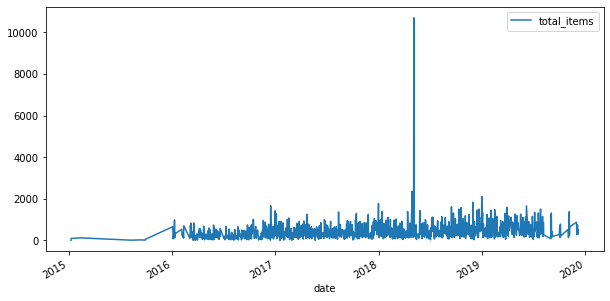

In [31]:
# Count of total_items
res_df.plot(figsize=(10,5))

<AxesSubplot:xlabel='date'>

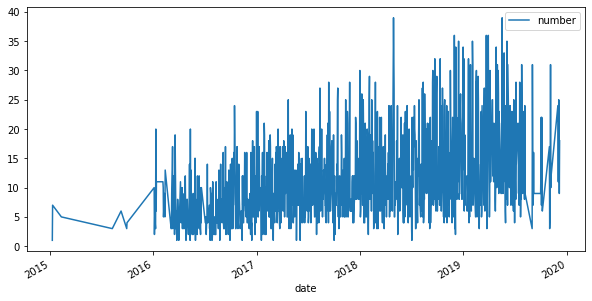

In [32]:
# Count of unique number per date
res_unique_df.plot(figsize=(10,5))

Here in the plot (<font color='brown'>Count of unique number per date</font>), we can see that our time series is very scattered, and also we are getting 5 to 35 orders every day. Let’s make the visualization clear.

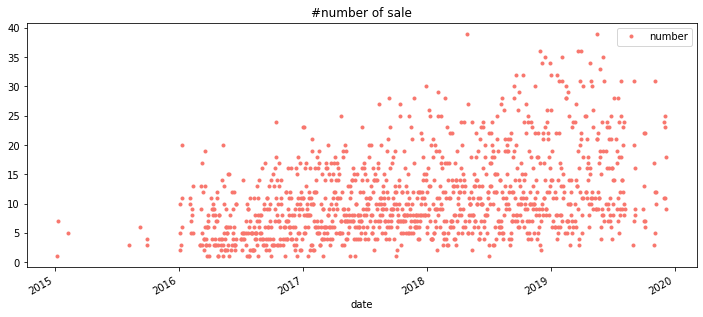

In [36]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = res_unique_df.plot(style='.', figsize=(12,5), color=color_pal[0], title='#number of sale')

<b>Things are much clearer now we can say now we have the main density of order numbers in the range between 5 to 10 or 15</b>. Now our data requires some conversions so that we can fit it into the model. 

<a id='sect4_2'></a>
### <font color='darkgreen'>Data conversions</font>
Let’s split our data:

In [48]:
split_date = '01-Jan-2019'
data_train = res_unique_df.loc[res.index <= split_date].copy()
data_test = res_unique_df.loc[res.index > split_date].copy()

In this, we have splitted our data into train and <b>test data after the date 01-Jan-2019</b>. So that we can check our model after the year 2018. Let’s see how our split datasets are.

In [49]:
data_train[-5:]

,number
date,
2018-12-28,18
2018-12-29,13
2018-12-30,16
2018-12-31,34
2019-01-01,14


In [50]:
data_test[:5]

,number
date,
2019-01-02,26
2019-01-03,32
2019-01-04,6
2019-01-05,14
2019-01-06,19


Let’s plot our split data.

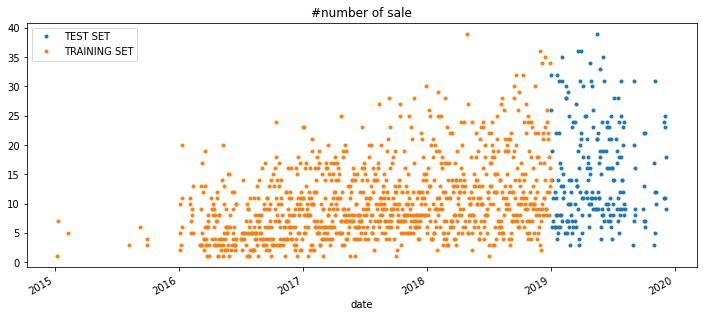

In [51]:
_ = data_test \
    .rename(columns={'number': 'TEST SET'}) \
    .join(data_train.rename(columns={'number': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(12,5), title='#number of sale', style='.')

Here we can see that our datasets have different colours. After this, we can <b>make a function that can create time-series features from our data</b>:

In [55]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

Let’s use the function in our data:

In [56]:
X_train, y_train = create_features(data_train, label='number')
X_test, y_test = create_features(data_test, label='number')
X_train.sample(n=5)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2017-08-13,0,6,3,8,2017,225,13,32
2016-12-20,0,1,4,12,2016,355,20,51
2018-11-15,0,3,4,11,2018,319,15,46
2018-01-15,0,0,1,1,2018,15,15,3
2018-04-22,0,6,2,4,2018,112,22,16


In [60]:
X_train.dtypes

hour           int64
dayofweek      int64
quarter        int64
month          int64
year           int64
dayofyear      int64
dayofmonth     int64
weekofyear    UInt32
dtype: object

In [63]:
X_train = X_train.astype({'weekofyear': int})
X_test = X_test.astype({'weekofyear': int})

In [64]:
X_train.dtypes

hour          int64
dayofweek     int64
quarter       int64
month         int64
year          int64
dayofyear     int64
dayofmonth    int64
weekofyear    int64
dtype: object

In the above output, we can see what are the features we have in our data for training. <b>Since XGBoost is a process of supervised learning to work with it we are required to make our data the data for supervised learning</b>.

<a id='sect4_3'></a>
### <font color='darkgreen'>Model fitting</font>
Instantiating our model:

In [58]:
reg = xgb.XGBRegressor(n_estimators=1000)

Fitting our data into the model:

In [65]:
%%time
reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=50, verbose=False)

CPU times: user 190 ms, sys: 80.6 ms, total: 270 ms
Wall time: 120 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Before making predictions on the test data we can also follow the process of feature selection. In this process, we can do this using the feature importance technique. This process will help us in finding the feature from the data the model is relying on most to make the prediction. <b>One more thing which is important here is that we are using XGBoost which works based on splitting data using the important feature. So finding the important feature will make the background process much clearer</b>. 

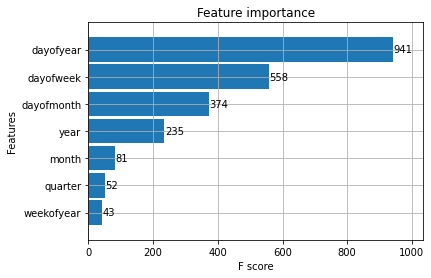

In [66]:
_ = plot_importance(reg, height=0.9)

In the above output, we can see that <b>`dayofyear` is our most important feature and the model has used it most commonly to split on more nodes. Feature `weekofyear` has the lowest importance</b>. 

<a id='sect4_4'></a>
### <font color='darkgreen'>Forecasting</font>
After fitting the model and feature selection process <b>we can make predictions using our test data and model</b>. Using the below lines of codes we can do this.

In [70]:
data_test['number_prediction'] = reg.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)
data_all[['number', 'number_prediction']]

,number,number_prediction
date,,
2019-01-02,26,8.262124
2019-01-03,32,8.072212
2019-01-04,6,14.582115
2019-01-05,14,17.201303
2019-01-06,19,17.285898
...,...,...
2018-12-28,18,NaN
2018-12-29,13,NaN
2018-12-30,16,NaN


Now lets plot our prediction:

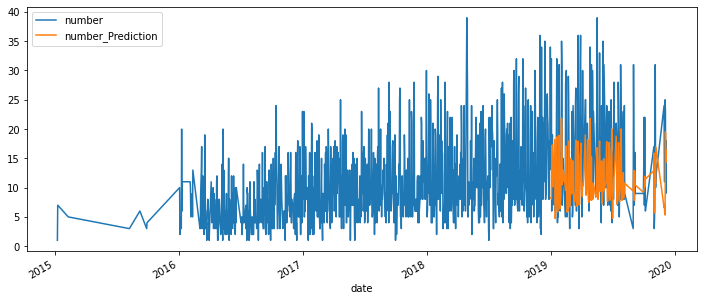

In [68]:
_ = data_all[['number','number_Prediction']].plot(figsize=(12, 5))

Here we can see our prediction. As we have discussed, the order values are moving around the range between 5 to 15 and our model is also predicting between this range. <b>Using those predictions we can tell the restaurant to prepare around this range only so that we can reduce the wastage of food and maximize profit</b>.

## <font color='darkblue'>Final words</font>
<b>In this article, we have gone through the process of applying XGBoost in time series modelling and forecasting</b>. Also, with this, we have discussed some of the data analysis processes that can be helpful in solving real-life problems.   